# Diagonalization of large many-body Hamiltonians on a quantum processor

## Step 1: Map problem to quantum native format

Across disciplines, we're interested in learning ground state properties of quantum systems. Examples include understanding the fundamental nature of particles and forces, predicting and undestanding the behavior of complex materials and understanding bio-chemical interactions and reactions. Because of the exponential growth of the Hilbert space and the correlation that arise in entangled systems, classical algorithm struggle to solve this problem for quantum systems of increasing size. At one end of the spectrum, existing approach that take advantage of the quantum hardware focus on variational quantum methods (e. g. [variational quantum eigen-solver](https://learning.quantum.ibm.com/tutorial/variational-quantum-eigensolver)). These techniques face challenges with current devices because of the high number of function calls required in the optimization process, which is incompatible with advanced error mitigation techniques, thus limiting their efficacy to small systems. At the other end of the spectrum, there are fault-tolerant quantum methods with performance guarantees (e.g. [quantum phase estimation](https://arxiv.org/pdf/quant-ph/0604193.pdf)) which require deep circuits that can be executed only on a fault-tolerant device. For these reasons, we introduce here a quantum algorithm based on subspace methods (as reviewed [here](https://arxiv.org/pdf/2312.00178.pdf)), the Krylov quantum diagonalization (KQD) algorithm. This algorithm performs well at [large scale](https://arxiv.org/abs/2407.14431) on existing quantum hardware, shares similar [performance guarantees](https://arxiv.org/pdf/2110.07492.pdf) as phase estimation, is compatible with advanced error mitigation techniques and could provide results that are classically inaccessible.

Let us now go into more details of how subspace methods, and the Krylov quantum diagonalization algorithm in particular, work. Given a matrix $H$ for which we want to know its lowest eigenvalue, subspace methods construct of a smaller representation $\tilde{H}$ of $H$, which captures its properties of interest. In the case of the KQD algorithm, the Krylov subspace is used to construct the effective representation.

### What is the Krylov subspace? 

By definition, the Krylov subspace $\mathcal{K}^r$ of order $r$ is the subspace spanned by vectors obtained by multiplying higher powers of a matrix $A$, up to $r-1$, with a reference vector $\vert \psi \rangle$.

$$ \mathcal{K}^r = \left\{ \vert \psi \rangle, A \vert \psi \rangle, A^2 \vert \psi \rangle, ..., A^{r-1} \vert \psi \rangle \right\} $$

If the matrix $A$ is the Hamiltonian $H$, we'll refer to the corresponding subspace as the power Krylov space $\mathcal{K}_P$. In the case where $A$ is the time-evolution operator generated by the Hamiltonian $U=e^{-iHt}$, we'll refer to the subspace as the unitary Krylov subspace $\mathcal{K}_U$



### Why is it useful for ground state energy problems?

State of the art classical subspace algorithms rely on the power Krylov subspace to approximately diagonalize the Hamiltonian of large quantum systems. We can gain some insight on why the  subspace is interesting by first expanding the reference state in terms of the eigenvectors $\vert \lambda_i \rangle$ of the matrix $H$:

$$ \vert \psi \rangle = c_1 \vert \lambda_1 \rangle + c_2 \vert \lambda_2 \rangle + ... + c_n \vert \lambda_n \rangle $$

Then applying $j^{th}$ power of the matrix $H$ on each eigenvector of the expansion of the reference gives:

$$ H^n \vert \psi \rangle = c_1 \lambda_1^n \vert \lambda_1 \rangle + c_2 \lambda_2^n \vert \lambda_2 \rangle + ... + c_n \lambda_n^n \vert \lambda_n \rangle $$

Since $H \vert \lambda_i \rangle = \lambda  \vert \lambda_i \rangle$. The equation above shows that the component $k$ with the largest eigenvalue $\lambda_k$ is amplified by the power iteration and thus becomes the dominant contribution (This can also be a problem as the basis vector become too similar to each other). The same is true for the smallest eigenvalue, if we consider power iteration of the matrix $H^{-1}$.




### The unitary Krylov subspace
The Krylov subspace is constructed using the power iteration method. Therefore, states in the Krylov subspace corresponding to the multiplication with higher power of the matrix with the reference states will have the contribution of the ground state $\vert \lambda_k \rangle$ enhanced.


The power Krylov subspace that we use classically cannot be generated directly on a quantum computer as $H$ is not a unitary matrix. Instead, we can use the time-evolution operator $U = e^{-iHt}$ which can be shown to give similar [convergence guarantees](https://arxiv.org/pdf/2110.07492.pdf) as the power method. Powers of $U$ then become different time steps $U^k = e^{-iH(kt)}$.


$$\mathcal{K}_U^r = \left\{ \vert \psi \rangle, U \vert \psi \rangle, U^2 \vert \psi \rangle, ..., U^{r-1} \vert \psi \rangle \right\}$$




### Enter the Krylov quantum diagonalization algorithm

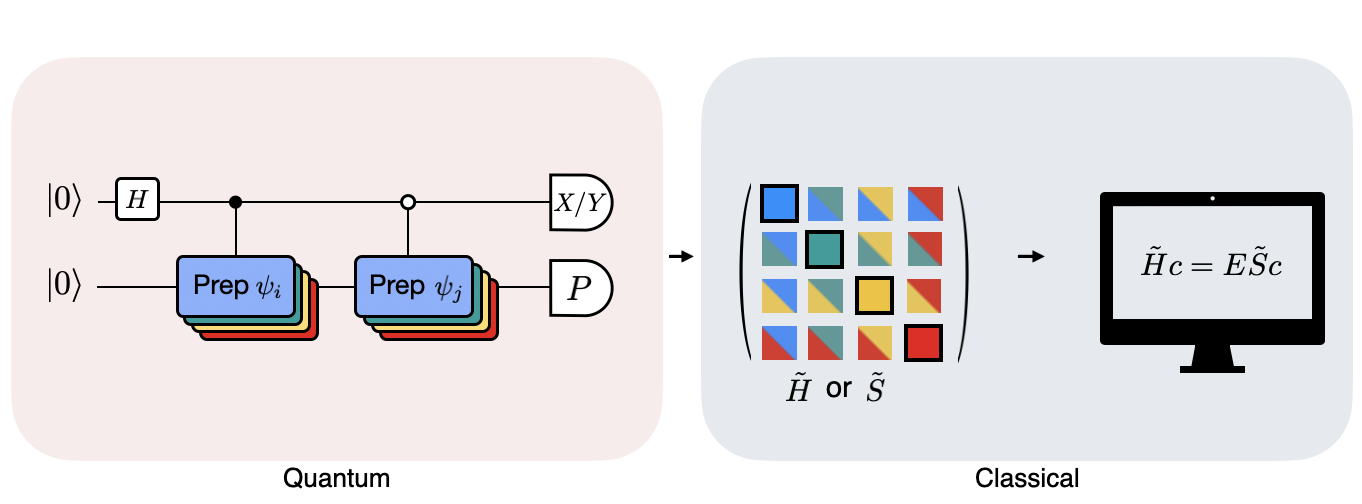

We now have all the ingredients required to introduced the quantum algorithm which will be the focus of this tutorial, Krylov Quantum Diagonalization (KQD). Given an Hamiltonian $H$ that we wish to diagonalize, first we consider the corresponding unitary Krylov space $\mathcal{K}_U$. The goal is to find a compact represention of the Hamiltonian in $\mathcal{K}_U$, which we'll refer to as $\tilde{H}$. The matrix elements of $\tilde{H}$ can be calculated in the following way

$$\tilde{H}_{mn} = \langle \psi_m \vert H \vert \psi_n \rangle = $$
$$= \langle \psi \vert  e^{i H t_m}   H e^{-i H t_n} \vert \psi \rangle$$
$$= \langle \psi \vert  e^{i H m \delta t}   H e^{-i H n \delta t} \vert \psi \rangle$$

On a quantum computer, the calculation of each matrix elements can be done with any algorithm which allows to obtain overlap between quantum states. In this tutorial we'll focus on the Hadamard test. Given that the $\mathcal{K}_U$ has dimension $r$, the Hamiltonian projected into the subspace will have dimensions $r \times r$. With $r$ small enough (generally $r<<100$ is sufficient to obtain convergence of estimates of eigenenergies) we can then easily diagonalize the projected Hamiltonian $\tilde{H}$. However, we cannot directly diagonalize $\tilde{H}$ because of the non-orthogonality of the Krylov subpace vectors. We'll have to measure their overlaps and construct a matrix $\tilde{S}$

$$ S_{mn} = \langle \psi_m \vert \psi_n \rangle$$


This allows us to solve the eigenvalue problem in a non-orthogonal space (also called generalized eigenvalue problem)

$$ \tilde{H} \ \vec{c} = c \ \tilde{S} \ \vec{c} $$

One can then obtain estimates of the eigenvalues and eigenstates of $H$ by looking at the ones of $\tilde{H}$. For example, the estimate of the ground state energy is obtained by taking the smallest eigenvalue $c$ and the ground state from the corresponding eigenvcetor $\vec{c}$. The coefficients in $\vec{c}$ determines the contribution of the different vectors that span $\mathcal{K}_U$.



### Let's work through a concrete example

#### Imports and definitions



In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from typing import Union, List
import warnings
warnings.filterwarnings('ignore')

from qiskit.quantum_info import SparsePauliOp, Pauli
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import LieTrotter
from qiskit.providers.fake_provider import Fake20QV1
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

import itertools as it

def solve_regularized_gen_eig(h: np.ndarray, s:np.ndarray, threshold: float, k: int =1, return_dimn: bool = False) -> Union[float, List[float]]:
    """
    Method for solving the generalized eigenvalue problem with regularization

    Args:
        h (numpy.ndarray):
            The effective representation of the matrix in the Krylov subspace
        s (numpy.ndarray):
            The matrix of overlaps between vectors of the Krylov subspace
        threshold (float):
            Cut-off value for the eigenvalue of s
        k (int):
            Number of eigenvalues to return
        return_dimn (bool):
            Whether to return the size of the regularized subspace

    Returns:
        lowest k-eigenvalue(s) that are the solution of the regularized generalized eigenvalue problem

    
    """
    s_vals, s_vecs = sp.linalg.eigh(s)
    s_vecs = s_vecs.T
    good_vecs = np.array([vec for val, vec in zip(s_vals, s_vecs) if val > threshold])
    h_reg = good_vecs.conj() @ h @ good_vecs.T
    s_reg = good_vecs.conj() @ s @ good_vecs.T
    if k==1:
        if return_dimn:
            return sp.linalg.eigh(h_reg, s_reg)[0][0], len(good_vecs)
        else:
            return sp.linalg.eigh(h_reg, s_reg)[0][0]
    else:
        if return_dimn:
            return sp.linalg.eigh(h_reg, s_reg)[0][:k], len(good_vecs)
        else:
            return sp.linalg.eigh(h_reg, s_reg)[0][:k]
        


def single_particle_gs(H_op, n_qubits):
    """
    Find the ground state of the single particle(excitation) sector
    """
    H_x = []
    for p, coeff in H_op.to_list():
        H_x.append(set([i for i,v in enumerate(Pauli(p).x) if v]))

    H_z = []
    for p, coeff in H_op.to_list():
        H_z.append(set([i for i,v in enumerate(Pauli(p).z) if v]))

    H_c = H_op.coeffs

    print('n_sys_qubits', n_qubits)

    n_exc = 1
    sub_dimn = int(sp.special.comb(n_qubits+1,n_exc))
    print('n_exc', n_exc, ', subspace dimension', sub_dimn)

    few_particle_H = np.zeros((sub_dimn,sub_dimn), dtype=complex)

    sparse_vecs = [set(vec) for vec in it.combinations(range(n_qubits+1),r=n_exc)] # list all of the possible sets of n_exc indices of 1s in n_exc-particle states

    m = 0
    for i, i_set in enumerate(sparse_vecs):
        for j, j_set in enumerate(sparse_vecs):
            m += 1

            if len(i_set.symmetric_difference(j_set)) <= 2:

                for p_x, p_z, coeff in zip(H_x, H_z, H_c):

                    if i_set.symmetric_difference(j_set) == p_x:
                        sgn = ((-1j)**len(p_x.intersection(p_z)))*((-1)**len(i_set.intersection(p_z)))
                    else:
                        sgn = 0

                    few_particle_H[i,j] += sgn*coeff

    gs_en = min(np.linalg.eigvalsh(few_particle_H))
    print('single particle ground state energy: ', gs_en)
    return gs_en

#### Define Hamiltonian

Let's consider the Heisenberg Hamiltonian for $N$ qubits on a linear chain: $H= J \sum_{i,j}^N X_i X_j + Y_i Y_j - Z_i Z_j$

In [2]:
# Define problem Hamiltonian.
n_qubits = 20
J = 1 # coupling strength for ZZ interaction

# Define the Hamiltonian: 
H_int = [['I']*n_qubits for _ in range(3*(n_qubits-1))]
for i in range(n_qubits-1):
    H_int[i][i] = 'Z'
    H_int[i][i+1] = 'Z'
for i in range(n_qubits-1):
    H_int[n_qubits-1+i][i] = 'X'
    H_int[n_qubits-1+i][i+1] = 'X'
for i in range(n_qubits-1):
    H_int[2*(n_qubits-1)+i][i] = 'Y'
    H_int[2*(n_qubits-1)+i][i+1] = 'Y'
H_int = [''.join(term) for term in H_int]
H_tot = [(term, -J) if term.count('Z') == 2 else (term, 1) for term in H_int]

# Get operator
H_op = SparsePauliOp.from_list(H_tot)
print(H_tot)

[('ZZIIIIIIIIIIIIIIIIII', -1), ('IZZIIIIIIIIIIIIIIIII', -1), ('IIZZIIIIIIIIIIIIIIII', -1), ('IIIZZIIIIIIIIIIIIIII', -1), ('IIIIZZIIIIIIIIIIIIII', -1), ('IIIIIZZIIIIIIIIIIIII', -1), ('IIIIIIZZIIIIIIIIIIII', -1), ('IIIIIIIZZIIIIIIIIIII', -1), ('IIIIIIIIZZIIIIIIIIII', -1), ('IIIIIIIIIZZIIIIIIIII', -1), ('IIIIIIIIIIZZIIIIIIII', -1), ('IIIIIIIIIIIZZIIIIIII', -1), ('IIIIIIIIIIIIZZIIIIII', -1), ('IIIIIIIIIIIIIZZIIIII', -1), ('IIIIIIIIIIIIIIZZIIII', -1), ('IIIIIIIIIIIIIIIZZIII', -1), ('IIIIIIIIIIIIIIIIZZII', -1), ('IIIIIIIIIIIIIIIIIZZI', -1), ('IIIIIIIIIIIIIIIIIIZZ', -1), ('XXIIIIIIIIIIIIIIIIII', 1), ('IXXIIIIIIIIIIIIIIIII', 1), ('IIXXIIIIIIIIIIIIIIII', 1), ('IIIXXIIIIIIIIIIIIIII', 1), ('IIIIXXIIIIIIIIIIIIII', 1), ('IIIIIXXIIIIIIIIIIIII', 1), ('IIIIIIXXIIIIIIIIIIII', 1), ('IIIIIIIXXIIIIIIIIIII', 1), ('IIIIIIIIXXIIIIIIIIII', 1), ('IIIIIIIIIXXIIIIIIIII', 1), ('IIIIIIIIIIXXIIIIIIII', 1), ('IIIIIIIIIIIXXIIIIIII', 1), ('IIIIIIIIIIIIXXIIIIII', 1), ('IIIIIIIIIIIIIXXIIIII', 1), ('IIIIIIIIIIIIIIXXIIII'

#### Set parameters for the algorithm

Heuristically choose `dt` (based on upper bounds)

In [3]:
from qiskit.quantum_info import Pauli
# Get Hamiltonian restricted to single-particle states
single_particle_H = np.zeros((n_qubits,n_qubits))
for i in range(n_qubits):
    for j in range(i+1):
        for p, coeff in H_op.to_list():
            p_x = Pauli(p).x
            p_z = Pauli(p).z
            if all(p_x[k] == ((i==k)+(j==k))%2 for k in range(n_qubits)):
                sgn = ((-1j)**sum(p_z[k] and p_x[k] for k in range(n_qubits)))*((-1)**p_z[i])
            else:
                sgn = 0
            single_particle_H[i,j] += sgn*coeff
for i in range(n_qubits):
    for j in range(i+1,n_qubits):
        single_particle_H[i,j] = np.conj(single_particle_H[j,i])

# Set dt according to spectral norm
dt = np.pi/np.linalg.norm(single_particle_H, ord=2)
dt

0.16534698176788387

And set other parameters of the algorithm

In [4]:
# Set parameters for quantum Krylov algorithm
krylov_dim = 5 # size of krylov subspace
num_trotter_steps = 6
dt_circ = dt/num_trotter_steps

#### State preparation
Pick a reference state $\vert \psi \rangle$ that has some overlap with the ground state. For this Hamiltonian, We use the a state with an excitation in the middle qubit $\vert 00..010...00 \rangle$ as our reference state.

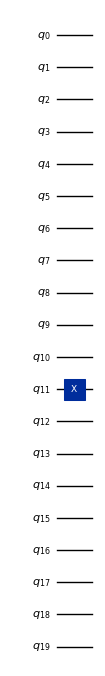

In [12]:
qc_state_prep = QuantumCircuit(n_qubits)
qc_state_prep.x(int(n_qubits/2)+1)
qc_state_prep.draw('mpl', scale=0.5)

#### Time evolution

We can realize the time-evolution operator generated by a given Hamiltonian: $U=e^{-iHt}$ via the [Lie-Trotter approximation](https://docs.quantum.ibm.com/api/qiskit/qiskit.synthesis.LieTrotter).

In [7]:
t = Parameter('t')

## Create the time-evo op circuit
evol_gate = PauliEvolutionGate(H_op, time=t, synthesis=LieTrotter(reps=num_trotter_steps) )

qr = QuantumRegister(n_qubits)
qc_evol = QuantumCircuit(qr)
qc_evol.append(evol_gate, qargs=qr)

#### Hadamard test

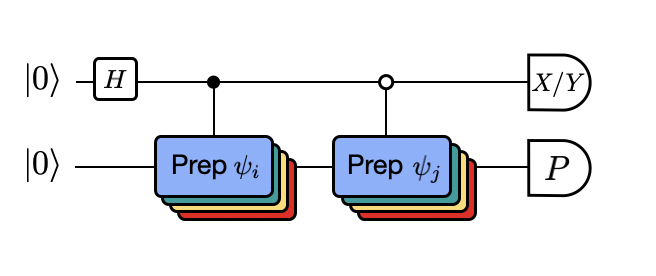

\begin{equation}
    |0\rangle_a|\psi_0\rangle\quad\longrightarrow\quad\frac{1}{\sqrt{2}}\Big(|0\rangle+|1\rangle\Big)_a|\psi_0\rangle\quad\longrightarrow\quad\frac{1}{\sqrt{2}}\Big(|0\rangle_a|\psi_0\rangle+|1\rangle_aU_j^\dagger PU_k|\psi_0\rangle\Big)
\end{equation}
Where $P$ is one of the terms in the decomposition of the Hamiltonian $H=\sum P$. To measure $X$, first apply $H$...
\begin{equation}
    \longrightarrow\quad\frac{1}{2}|0\rangle_a\Big(|\psi_0\rangle+U_j^\dagger PU_k|\psi_0\rangle\Big) + \frac{1}{2}|1\rangle_a\Big(|\psi_0\rangle-U_j^\dagger PU_k|\psi_0\rangle\Big)
\end{equation}
... then measure:
\begin{equation}
\begin{split}
    \Rightarrow\quad\langle X\rangle_a &= \frac{1}{4}\Bigg(\Big\||\psi_0\rangle+U_j^\dagger PU_k|\psi_0\rangle\Big\|^2-\Big\||\psi_0\rangle-U_j^\dagger PU_k|\psi_0\rangle\Big\|^2\Bigg) \\
    &= \text{Re}\Big[\langle\psi_0|U_j^\dagger PU_k|\psi_0\rangle\Big].
\end{split}
\end{equation}
Similarly, measuring $Y$ yields
\begin{equation}
    \langle Y\rangle_a = \text{Im}\Big[\langle\psi_0|U_j^\dagger PU_k|\psi_0\rangle\Big].
\end{equation}

Circuit for calculating the real part of the overlap in S via Hadamard test


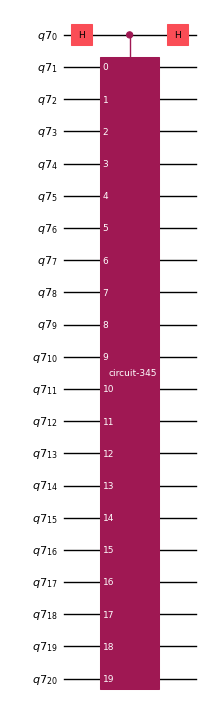

In [8]:
## Create the time-evo op circuit
evol_gate = PauliEvolutionGate(H_op, time=dt, synthesis= LieTrotter(reps=num_trotter_steps) )

## Create the time-evo op dagger circuit
evol_gate_d = PauliEvolutionGate(H_op, time=dt, synthesis= LieTrotter(reps=num_trotter_steps) )
evol_gate_d = evol_gate_d.inverse()

# Put pieces together
qc_reg = QuantumRegister(n_qubits)
qc_temp = QuantumCircuit(qc_reg)
qc_temp.compose(qc_state_prep, inplace=True)
for _ in range(num_trotter_steps):
    qc_temp.append(evol_gate, qargs=qc_reg)
for _ in range(num_trotter_steps):
    qc_temp.append(evol_gate_d, qargs=qc_reg)
qc_temp.compose(qc_state_prep.inverse(), inplace=True)

# Create controlled version of the circuit
controlled_U = qc_temp.to_gate().control(1)

# Create hadamard test circuit for real part
qr = QuantumRegister(n_qubits+1)
qc_real = QuantumCircuit(qr)
qc_real.h(0)
qc_real.append(controlled_U, list(range(n_qubits+1)))
qc_real.h(0)

print('Circuit for calculating the real part of the overlap in S via Hadamard test')
qc_real.draw('mpl', fold=-1, scale=0.5)

The Hadamard test circuit can be a deep circuit once we decompose to native gates (which will increase even more if we account for the topology of the device)

In [9]:
print('Number of layers of 2Q operations', qc_real.decompose().decompose().depth(lambda x: x[0].num_qubits == 2))

Number of layers of 2Q operations 79345


## Step 2: Optimize circuits and operators

### Efficient Hadamard test
We can optimize the deep circuits for the Hadamard test that we have obtained by introducing some approximations and relying on some assumption about the model Hamiltonian. For example, consider the following circuit for the Hadamard test:

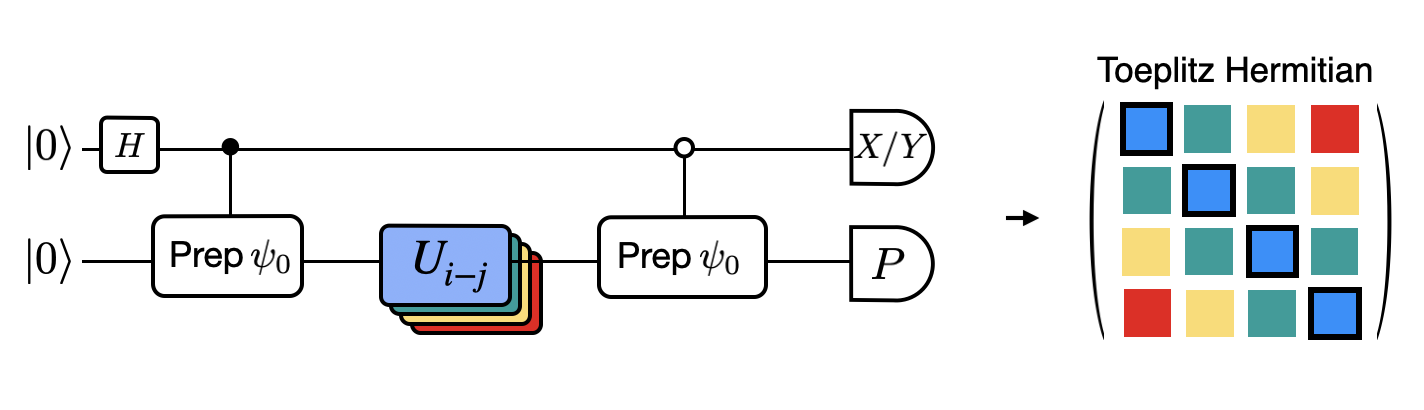

Assume we can classically calculate $E_0$, the eigenvalue of $|0\rangle^N$ under the Hamiltonian $H$.
This is satisfied when the Hamiltonian preserves the U(1) symmetry.
Assume that the gate $\psi_0-prep$ prepares our desired reference state $\ket{\psi_0}$, e.g., to prepare the HF state for chemistry $\psi_0-prep$ would be a product of single-qubit NOTs, so controlled-$\psi_0-prep$ is just a product of CNOTs.
Then the circuit above implements the following state prior to measurement:

\begin{equation}
\begin{split}
    \ket{0} \ket{0}^N\xrightarrow{H}&\frac{1}{\sqrt{2}}
    \left(
    \ket{0}\ket{0}^N+ \ket{1} \ket{0}^N
    \right)\\
    \xrightarrow{\text{1-ctrl-init}}&\frac{1}{\sqrt{2}}\left(|0\rangle|0\rangle^N+|1\rangle|\psi_0\rangle\right)\\
    \xrightarrow{U}&\frac{1}{\sqrt{2}}\left(e^{i\phi}\ket{0}\ket{0}^N+\ket{1} U\ket{\psi_0}\right)\\
    \xrightarrow{\text{0-ctrl-init}}&\frac{1}{\sqrt{2}}
    \left(
    e^{i\phi}\ket{0} \ket{\psi_0}
    +\ket{1} U\ket{\psi_0}
    \right)\\
    =&\frac{1}{2}
    \left(
    \ket{+}\left(e^{i\phi}\ket{\psi_0}+U\ket{\psi_0}\right)
    +\ket{-}\left(e^{i\phi}\ket{\psi_0}-U\ket{\psi_0}\right)
    \right)\\
    =&\frac{1}{2}
    \left(
    \ket{+i}\left(e^{i\phi}\ket{\psi_0}-iU\ket{\psi_0}\right)
    +\ket{-i}\left(e^{i\phi}\ket{\psi_0}+iU\ket{\psi_0}\right)
    \right)
\end{split}
\end{equation}

where we have used the classical simulable phase shift $ U\ket{0}^N = e^{i\phi}\ket{0}$ in the third line. Therefore the expectation values are obtained as

\begin{equation}
\begin{split}
    \langle X\otimes P\rangle&=\frac{1}{4}
    \Big(
    \left(e^{-i\phi}\bra{\psi_0}+\bra{\psi_0}U^\dagger\right)P\left(e^{i\phi}\ket{\psi_0}+U\ket{\psi_0}\right)
    \\
    &\qquad-\left(e^{-i\phi}\bra{\psi_0}-\bra{\psi_0}U^\dagger\right)P\left(e^{i\phi}\ket{\psi_0}-U\ket{\psi_0}\right)
    \Big)\\
    &=\text{Re}\left[e^{-i\phi}\bra{\psi_0}PU\ket{\psi_0}\right],
\end{split}
\end{equation}

\begin{equation}
\begin{split}
    \langle Y\otimes P\rangle&=\frac{1}{4}
    \Big(
    \left(e^{-i\phi}\bra{\psi_0}+i\bra{\psi_0}U^\dagger\right)P\left(e^{i\phi}\ket{\psi_0}-iU\ket{\psi_0}\right)
    \\
    &\qquad-\left(e^{-i\phi}\bra{\psi_0}-i\bra{\psi_0}U^\dagger\right)P\left(e^{i\phi}\ket{\psi_0}+iU\ket{\psi_0}\right)
    \Big)\\
    &=\text{Im}\left[e^{-i\phi}\bra{\psi_0}PU\ket{\psi_0}\right].
\end{split}
\end{equation}


### Decompose time-evolution operator with Trotter decomposition
Instead of implementing the time-evolution operator exactly we can use the Trotter decomposition to implement an approximation of it. Repeating several times a certain order Trotter decomposition gives us further reduction of the error introduced from the approximation. In the following, we directly build the Trotter implementation in the most efficient way for the interaction graph of the Hamiltonian we are considering (nearest neighbor interactions only). In practice we insert Pauli rotations $R_{xx}$, $R_{yy}$, $R_{zz}$ with a parametrized angle $t$ which correspond to the approximate implementation of $e^{-i (XX + YY + ZZ) t}$. Given the difference in definition of the Pauli rotations and the time-evolution that we are trying to implement, we'll have to use the parameter $2*dt$ to achieve a time-evolution of $dt$. Furthermore, we reverse the order of the operations for odd number of repetitions of the Trotter steps, which is functionally equivalent but allows for synthesizing adjacent operations in a single $SU(2)$ unitary. This gives a much shallower circuit than what is obtained using the generic `PauliEvolutionGate()` functionality. 

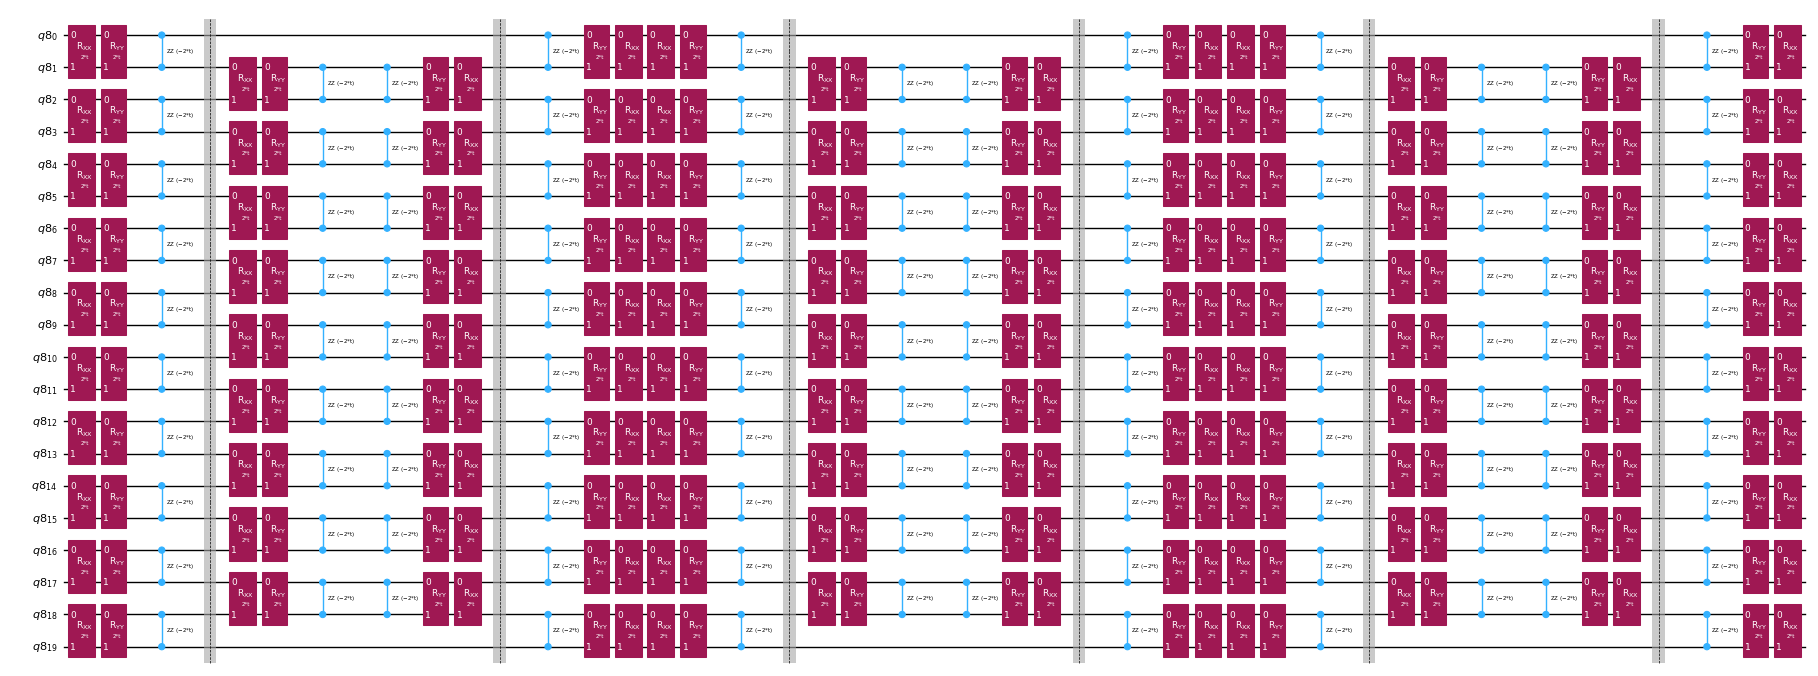

In [9]:
t = Parameter('t')

# Create instruction for rotation about XX+YY-ZZ:
Rxyz_circ = QuantumCircuit(2)
Rxyz_circ.rxx(2*t,0,1)
Rxyz_circ.ryy(2*t,0,1)
Rxyz_circ.rzz(-2*t,0,1)
Rxyz_instr = Rxyz_circ.to_instruction(label='RXX+YY-ZZ')

interaction_list = [[[i, i+1] for i in range(0, n_qubits-1, 2)], [[i, i+1] for i in range(1, n_qubits-1, 2)]] # linear chain

qr = QuantumRegister(n_qubits)
trotter_step_circ = QuantumCircuit(qr)
for i, color in enumerate(interaction_list):
    for interaction in color:
        trotter_step_circ.append(Rxyz_instr, interaction)
    if i < len(interaction_list) -1:
        trotter_step_circ.barrier()
    # trotter_step_circ.barrier()
reverse_trotter_step_circ = trotter_step_circ.reverse_ops()

qc_evol = QuantumCircuit(qr)
for step in range(num_trotter_steps):
    if step % 2 == 0:
        qc_evol = qc_evol.compose(trotter_step_circ)
    else:
        qc_evol = qc_evol.compose(reverse_trotter_step_circ)
        # qc_evol = qc_evol.compose(trotter_step_circ)

qc_evol.decompose().draw('mpl', fold=-1, scale = 0.5)

### Use an optimized circuit for state preparation

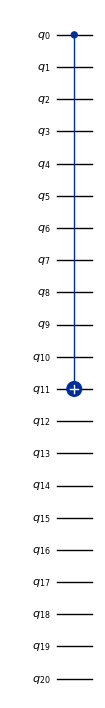

In [11]:
control = 0
excitation = int(n_qubits/2)+1
controlled_state_prep = QuantumCircuit(n_qubits + 1)
controlled_state_prep.cx(control, excitation)
controlled_state_prep.draw('mpl', fold=-1, scale=0.5)


### Template circuits for calculating matrix elements of $\tilde{S}$ and $\tilde{H}$ via Hadamard test
The only difference between the circuits used in the Hadamard test will be the phase in the time-evolution operator and the observables measured. Therefore we can prepare a template circuit which represent the generic circuit for the Hadamard test, with placeholders for the gates that depend on the time-evolution operator.

In [13]:
# Parameters for the template circuits
parameters = []
for idx in range(1, krylov_dim):
    parameters.append(dt_circ*(idx))

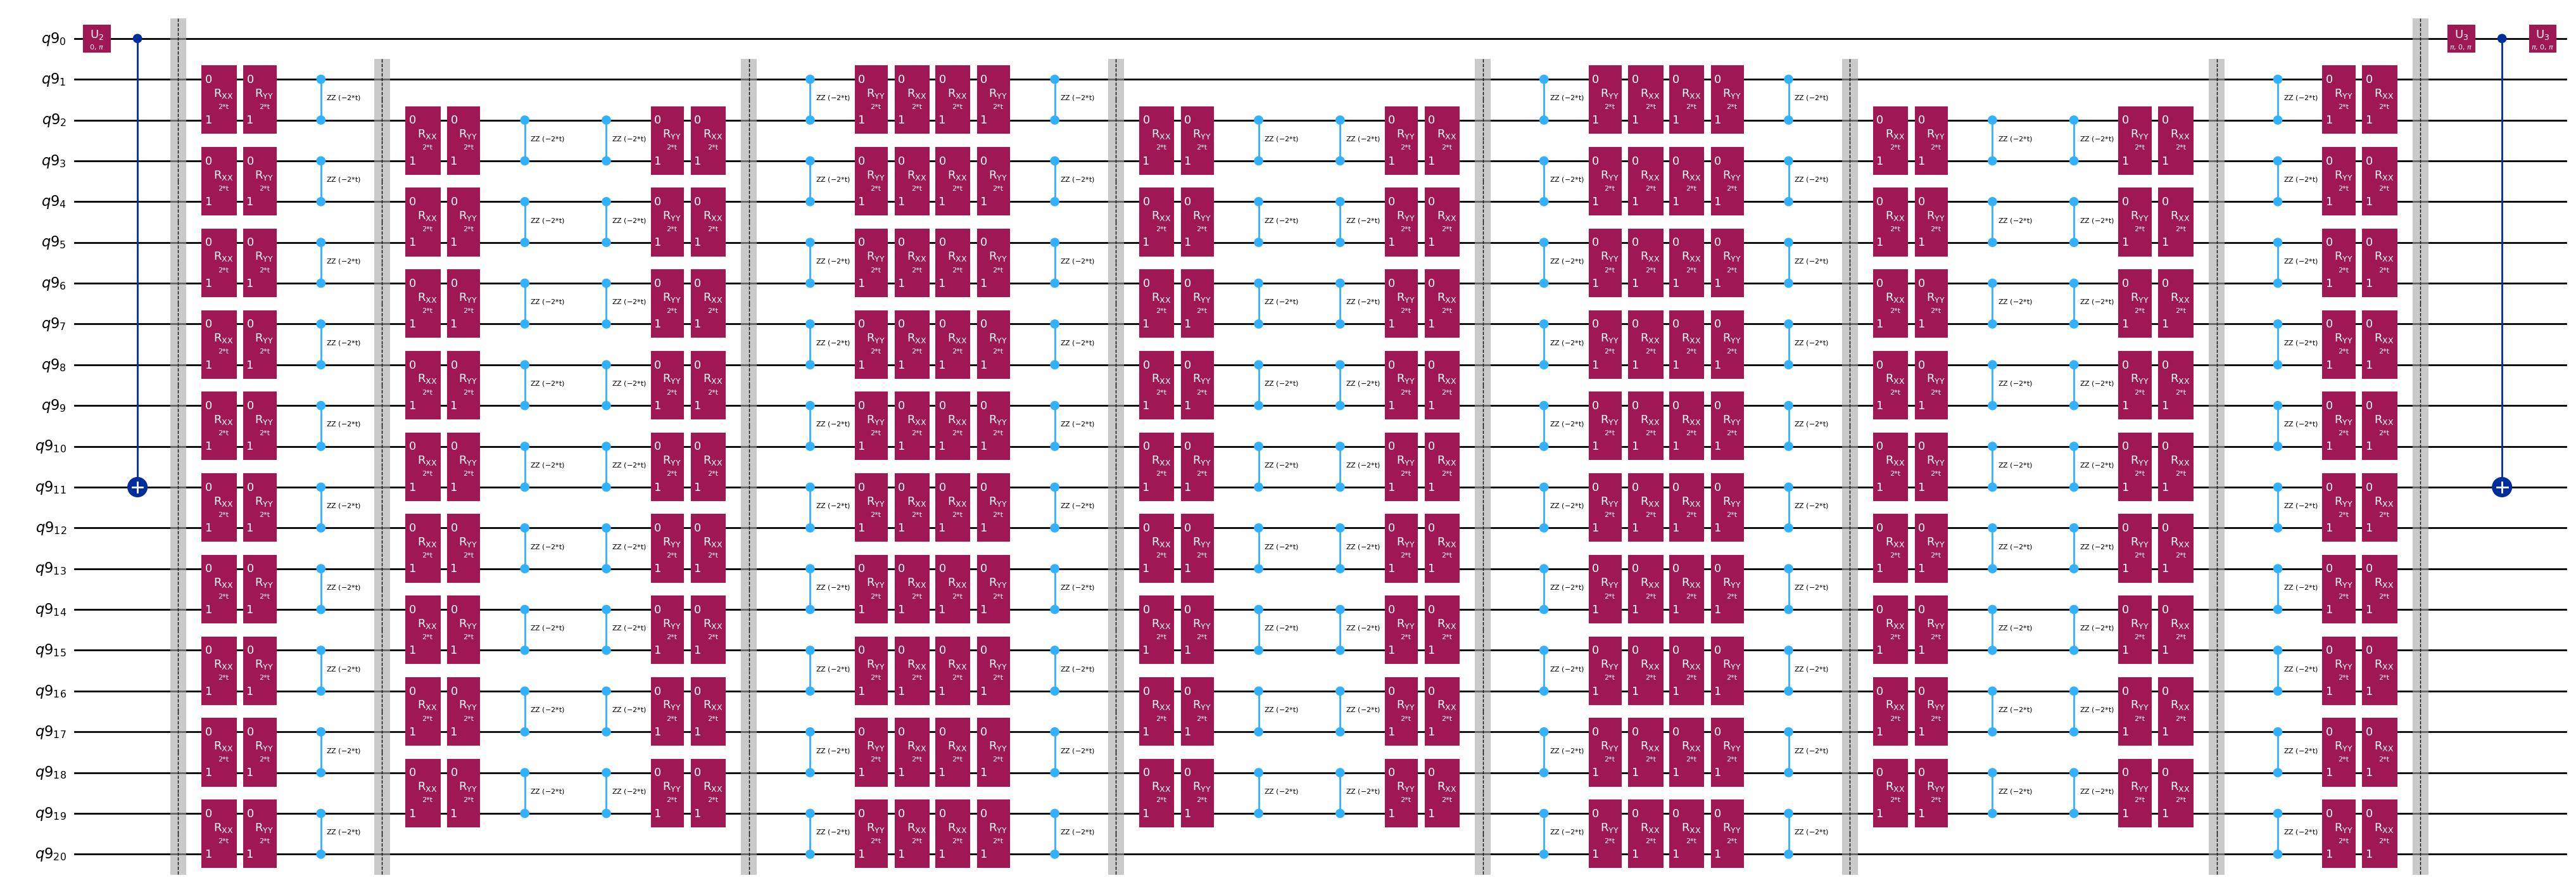

In [14]:
# Create modified hadamard test circuit
qr = QuantumRegister(n_qubits+1)
qc = QuantumCircuit(qr)
qc.h(0)
qc.compose(controlled_state_prep, list(range(n_qubits+1)), inplace=True)
qc.barrier()
qc.compose(qc_evol, list(range(1, n_qubits+1)), inplace=True)
qc.barrier()
qc.x(0)
qc.compose(controlled_state_prep.inverse(), list(range(n_qubits+1)), inplace=True)
qc.x(0)

qc.decompose().draw('mpl', fold=-1)

In [13]:
print('The optimized circuit has 2Q gates depth: ', qc.decompose().decompose().depth(lambda x: x[0].num_qubits ==2))

The optimized circuit has 2Q gates depth:  74


We have considerably reduced the depth of the Hadamard test with a combination of Trotter approximation and uncontrolled unitaries

## Step 3: Execute using a quantum primitive

Instantiate the backend and set runtime parameters

In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService, Batch

service = QiskitRuntimeService()
backend_id = 'ibm_torino'
backend = service.backend(backend_id)



### Transpile

In [17]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
basis_gates = list(target.operation_names)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend, basis_gates=basis_gates)

qc_trans = pm.run(qc)

52
OrderedDict([('rz', 1719), ('sx', 1109), ('cz', 478), ('x', 49), ('barrier', 8)])


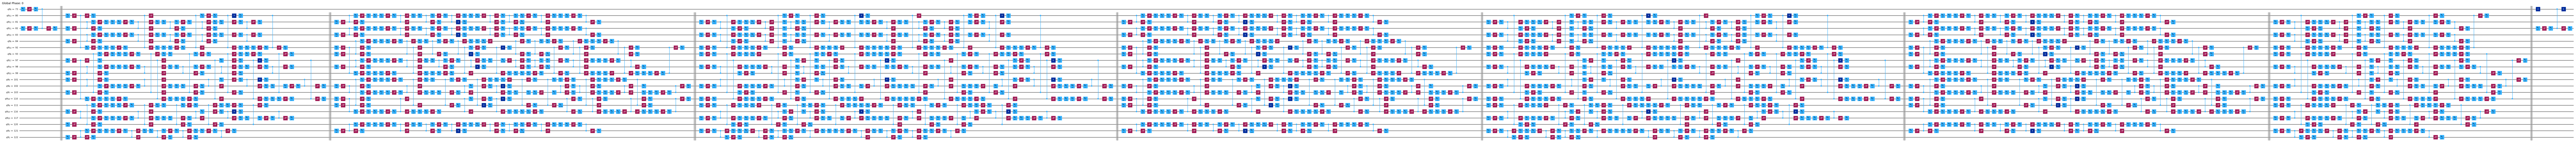

In [19]:
print(qc_trans.depth(lambda x: x[0].num_qubits==2))
print(qc_trans.count_ops())
qc_trans.draw('mpl', fold=-1, idle_wires=False, scale=0.5)


### Create PUBs for execution with Estimator

In [20]:
# Define observables to measure for S
observable_S_real = 'I'*(n_qubits) + 'X'
observable_S_imag = 'I'*(n_qubits) + 'Y'

observable_op_real = SparsePauliOp(observable_S_real) # define a sparse pauli operator for the observable
observable_op_imag = SparsePauliOp(observable_S_imag)

layout = qc_trans.layout # get layout of transpiled circuit
observable_op_real = observable_op_real.apply_layout(layout) # apply physical layout to the observable
observable_op_imag = observable_op_imag.apply_layout(layout)
observable_S_real = observable_op_real.paulis.to_labels() # get the label of the physical observable
observable_S_imag = observable_op_imag.paulis.to_labels() 

observables_S = [[observable_S_real], [observable_S_imag]]


# Define observables to measure for H
# Hamiltonian terms to measure
observable_list = []
for pauli, coeff in zip(H_op.paulis, H_op.coeffs):
    # print(pauli)
    observable_H_real = pauli[::-1].to_label() + 'X'
    observable_H_imag = pauli[::-1].to_label() + 'Y'
    observable_list.append([observable_H_real])
    observable_list.append([observable_H_imag])

layout = qc_trans.layout

observable_trans_list = []
for observable in observable_list:
    observable_op = SparsePauliOp(observable)
    observable_op = observable_op.apply_layout(layout)
    observable_trans_list.append([observable_op.paulis.to_labels()])

observables_H = observable_trans_list


# Define a sweep over parameter values
params = np.vstack(parameters).T


# Estimate the expectation value for all combinations of
# observables and parameter values, where the pub result will have
# shape (# observables, # parameter values).
pub = (qc_trans, observables_S + observables_H, params)




## Run circuits
Circuits for $t=0$ are classically calculable

In [21]:
from qiskit.quantum_info import StabilizerState, Pauli



qc_cliff = qc.assign_parameters({t:0})


# Get expectation values from experiment
S_expval_real = StabilizerState(qc_cliff).expectation_value(Pauli('I'*(n_qubits) + 'X'))
S_expval_imag = StabilizerState(qc_cliff).expectation_value(Pauli('I'*(n_qubits) + 'Y'))

# Get expectation values
S_expval = S_expval_real + 1j*S_expval_imag

H_expval = 0
for obs_idx, (pauli, coeff) in enumerate(zip(H_op.paulis, H_op.coeffs)):
    # Get expectation values from experiment
    expval_real = StabilizerState(qc_cliff).expectation_value(Pauli(pauli[::-1].to_label() + 'X'))
    expval_imag = StabilizerState(qc_cliff).expectation_value(Pauli(pauli[::-1].to_label() + 'Y'))
    expval = expval_real + 1j*expval_imag


    # Fill-in matrix elements
    H_expval += coeff*expval


print(H_expval)

(-15+0j)


Execute circuits for $S$ and $\tilde{H}$ with the Estimator

In [23]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator



# Experiment options
num_randomizations = 300
num_randomizations_learning = 20
max_batch_circuits = 20
shots_per_randomization = 100
learning_pair_depths = [0, 4, 24]
noise_factors = [1, 1.3, 1.6]

# Base option formatting
options = {
    # Builtin resilience settings for ZNE
    "resilience": {
        "measure_mitigation": True,
        "zne_mitigation": True,
        "zne": {"noise_factors": noise_factors},

        # TREX noise learning configuration
        "measure_noise_learning": {
            "num_randomizations": num_randomizations_learning,
            "shots_per_randomization": shots_per_randomization,
        },
        
        # PEA noise model configuration
        "layer_noise_learning": {
            "max_layers_to_learn": 10,
            "layer_pair_depths": learning_pair_depths,
            "shots_per_randomization": shots_per_randomization,
            "num_randomizations": num_randomizations_learning,
        },
    },
    
    # Randomization configuration
    "twirling": {
        "num_randomizations": num_randomizations,
        "shots_per_randomization": shots_per_randomization,
        "strategy": "all",
    },

    # Experimental settings for PEA method
    "experimental": {
        # # Just in case, disable any further qiskit transpilation not related to twirling / DD
        # "skip_transpilation": True,

        # Execution configuration
        "execution": {
            "max_pubs_per_batch_job": max_batch_circuits,
            "fast_parametric_update": True,
        },

        # Error Mitigation configuration
        "resilience": {
            # ZNE Configuration
            "zne": {
                "amplifier": "pea",
                "return_all_extrapolated": True,
                "return_unextrapolated": True,
                "extrapolated_noise_factors": [0] + noise_factors,
            }
        }
    }
}

with Batch(backend=backend) as batch:
    # Estimator
    estimator = Estimator(mode=batch, options=options)


    job = estimator.run([pub], precision=1)


## Step 4: Post-process and analyze results

In [24]:
results = job.result()[0]

### Calculate projected $\tilde{H}$ and $S$ matrices
First calculate the phase accumulated by the $\vert 0 \rangle$ state during the uncontrolled time evolution

In [25]:
prefactors = [np.exp(-1j*sum([c for p,c in H_op.to_list() if 'Z' in p])*i*dt) for i in range(1, krylov_dim)]

Once we have the results of the circuit executions we can post-process the data to calculate the matrix elements of $S$

In [26]:
# Assemble S, the overlap matrix of dimension D:
S_first_row = np.zeros(krylov_dim, dtype=complex)
S_first_row[0] = 1+0j

# Add in ancilla-only measurements:
for i in range(krylov_dim-1):

    # Get expectation values from experiment
    expval_real = results.data.evs[0][0][i] # automatic extrapolated evs if ZNE is used
    expval_imag = results.data.evs[1][0][i] # automatic extrapolated evs if ZNE is used

    # Get expectation values
    expval = expval_real + 1j*expval_imag
    S_first_row[i+1] += prefactors[i]*expval

S_first_row_list =  S_first_row.tolist() #for saving purposes     
            
            
S_circ = np.zeros((krylov_dim, krylov_dim), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(krylov_dim),repeat=2):
    if i >= j:
        S_circ[j,i] = S_first_row[i-j]
    else:
        S_circ[j,i] = np.conj(S_first_row[j-i])

In [27]:
from sympy import Matrix
Matrix(S_circ)

Matrix([
[                                        1.0,   -0.196434913889163 + 0.0500383940919276*I, 0.0546016995581735 - 0.0505379338507588*I, -0.00387682750070485 + 0.0422688947676071*I,  0.0153832239760824 - 0.00302755483851761*I],
[  -0.196434913889163 - 0.0500383940919276*I,                                         1.0, -0.196434913889163 + 0.0500383940919276*I,   0.0546016995581735 - 0.0505379338507588*I, -0.00387682750070485 + 0.0422688947676071*I],
[  0.0546016995581735 + 0.0505379338507588*I,   -0.196434913889163 - 0.0500383940919276*I,                                       1.0,   -0.196434913889163 + 0.0500383940919276*I,   0.0546016995581735 - 0.0505379338507588*I],
[-0.00387682750070485 - 0.0422688947676071*I,   0.0546016995581735 + 0.0505379338507588*I, -0.196434913889163 - 0.0500383940919276*I,                                         1.0,   -0.196434913889163 + 0.0500383940919276*I],
[ 0.0153832239760824 + 0.00302755483851761*I, -0.00387682750070485 - 0.0422688947676071*I, 

And the matrix elements of $\tilde{H}$

In [28]:
import itertools
# Assemble S, the overlap matrix of dimension D:
H_first_row = np.zeros(krylov_dim, dtype=complex)
H_first_row[0] = H_expval

for obs_idx, (pauli, coeff) in enumerate(zip(H_op.paulis, H_op.coeffs)):
    # Add in ancilla-only measurements:
    for i in range(krylov_dim-1):

        # Get expectation values from experiment
        expval_real = results.data.evs[2 + 2*obs_idx][0][i] # automatic extrapolated evs if ZNE is used
        expval_imag = results.data.evs[2 + 2*obs_idx + 1][0][i] # automatic extrapolated evs if ZNE is used

        # Get expectation values
        expval = expval_real + 1j*expval_imag
        H_first_row[i+1] += prefactors[i]*coeff*expval
        
H_first_row_list = H_first_row.tolist()           
            
H_eff_circ = np.zeros((krylov_dim, krylov_dim), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in itertools.product(range(krylov_dim),repeat=2):
    if i >= j:
        H_eff_circ[j,i] = H_first_row[i-j]
    else:
        H_eff_circ[j,i] = np.conj(H_first_row[j-i])



In [29]:
from sympy import Matrix
Matrix(H_eff_circ)

Matrix([
[                                   -15.0,   1.18720067378867 - 0.502314783745159*I, -0.567367191944345 + 0.377743288891421*I,  0.385971096063646 - 0.130802525438685*I, -0.457985312690567 + 0.302191303190108*I],
[  1.18720067378867 + 0.502314783745159*I,                                    -15.0,   1.18720067378867 - 0.502314783745159*I, -0.567367191944345 + 0.377743288891421*I,  0.385971096063646 - 0.130802525438685*I],
[-0.567367191944345 - 0.377743288891421*I,   1.18720067378867 + 0.502314783745159*I,                                    -15.0,   1.18720067378867 - 0.502314783745159*I, -0.567367191944345 + 0.377743288891421*I],
[ 0.385971096063646 + 0.130802525438685*I, -0.567367191944345 - 0.377743288891421*I,   1.18720067378867 + 0.502314783745159*I,                                    -15.0,   1.18720067378867 - 0.502314783745159*I],
[-0.457985312690567 - 0.302191303190108*I,  0.385971096063646 + 0.130802525438685*I, -0.567367191944345 - 0.377743288891421*I,   1.187200673788

Finally, we can solve the generalized eigenvalue problem for $\tilde{H}$:

$$\tilde{H} \vec{c} = c S \vec{c}$$

and get an estimate of the ground state energy $c_{min}$

In [30]:
gnd_en_circ_est_list = []
for d in range(1, krylov_dim+1):
    # Solve generalized eigenvalue problem
    gnd_en_circ_est = solve_regularized_gen_eig(H_eff_circ[:d, :d], S_circ[:d, :d], threshold=1e-1)
    gnd_en_circ_est_list.append(gnd_en_circ_est)
    print('The estimated ground state energy is: ', gnd_en_circ_est)

The estimated ground state energy is:  -15.0
The estimated ground state energy is:  -17.225793064472
The estimated ground state energy is:  -18.16187881765736
The estimated ground state energy is:  -18.5176173738637
The estimated ground state energy is:  -18.78640656528519


For a single-particle sector, we can efficiently calculate the ground state of this sector of the Hamiltonian classically

In [31]:
gs_en = single_particle_gs(H_op, n_qubits)

n_sys_qubits 20
n_exc 1 , subspace dimension 21
single particle ground state energy:  -19.0


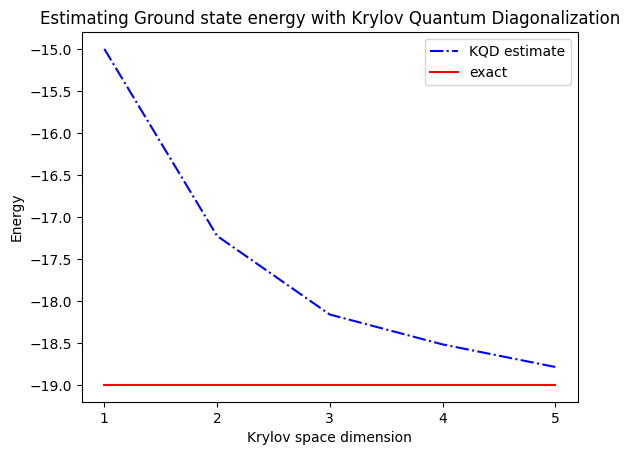

In [33]:
plt.plot(range(1, krylov_dim+1), gnd_en_circ_est_list, color = 'blue', linestyle='-.' , label = 'KQD estimate')
plt.plot(range(1, krylov_dim+1), [gs_en]*krylov_dim, color = 'red', linestyle='-' , label = 'exact')
plt.xticks(range(1, krylov_dim+1), range(1, krylov_dim+1))
plt.legend()
plt.xlabel('Krylov space dimension')
plt.ylabel('Energy')
plt.title('Estimating Ground state energy with Krylov Quantum Diagonalization')
plt.show()